## Spotify Analysis - Danceability

In [28]:
with open('./share/common.py') as fin:
   exec(fin.read())

with open('./share/matplotlibconf.py') as fin:
    exec(fin.read())


In [82]:
df = pd.read_csv('./data/SpotifyFeatures.csv')

In [83]:
df.loc[df['genre'] == "Children’s Music", 'genre'] = "Children's Music"

In [84]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World'], dtype=object)

In [85]:
df = pd.get_dummies(df, columns=['genre'], prefix=['genre'])

In [86]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'genre_A Capella', 'genre_Alternative',
       'genre_Anime', 'genre_Blues', 'genre_Children's Music',
       'genre_Classical', 'genre_Comedy', 'genre_Country', 'genre_Dance',
       'genre_Electronic', 'genre_Folk', 'genre_Hip-Hop', 'genre_Indie',
       'genre_Jazz', 'genre_Movie', 'genre_Opera', 'genre_Pop', 'genre_R&B',
       'genre_Rap', 'genre_Reggae', 'genre_Reggaeton', 'genre_Rock',
       'genre_Ska', 'genre_Soul', 'genre_Soundtrack', 'genre_World'],
      dtype='object')

In [87]:
df.loc[(df['popularity'] < 34), 'popularity' ] = 0
df.loc[(df['popularity'] >= 34) & (df['popularity'] < 52 ), 'popularity' ] = 1
df.loc[(df['popularity'] >= 52) , 'popularity' ] = 2

## The same feature as ANN-popularity part

In [88]:
features = ['popularity',
       'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', "genre_A Capella", 'genre_Alternative', 'genre_Anime', 'genre_Blues',
       "genre_Children's Music", 'genre_Classical', 'genre_Comedy',
       'genre_Country', 'genre_Dance', 'genre_Electronic', 'genre_Folk',
       'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz', 'genre_Movie',
       'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap', 'genre_Reggae',
       'genre_Reggaeton', 'genre_Rock', 'genre_Ska', 'genre_Soul',
       'genre_Soundtrack', "genre_World"]

In [89]:
df = df[features]
df.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,...,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World
0,0,0.611,0.389,0.910,0.000,0.3460,...,0,0,0,0,0,0
1,0,0.246,0.590,0.737,0.000,0.1510,...,0,0,0,0,0,0
2,0,0.952,0.663,0.131,0.000,0.1030,...,0,0,0,0,0,0
3,0,0.703,0.240,0.326,0.000,0.0985,...,0,0,0,0,0,0
4,0,0.950,0.331,0.225,0.123,0.2020,...,0,0,0,0,0,0


In [90]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import scikitplot as skplt

In [91]:
X = df.drop('popularity', axis=1)
y = df['popularity']
feature_names = X.columns

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [93]:
X_train.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World
194757,0.5590,0.288,0.516,0.00000,0.1790,-5.976,...,0,0,0,0,0,0
207397,0.7480,0.387,0.379,0.00258,0.0898,-12.589,...,0,0,0,0,0,1
30452,0.9250,0.370,0.137,0.98700,0.1170,-14.587,...,0,0,0,0,0,0
136375,0.1870,0.616,0.582,0.20000,0.0995,-9.676,...,0,0,0,0,0,0
19545,0.0234,0.778,0.957,0.00000,0.7150,-2.570,...,0,0,0,0,0,0


In [94]:
y_train.describe()

count    209452.000000
mean          0.991110
std           0.803658
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: popularity, dtype: float64

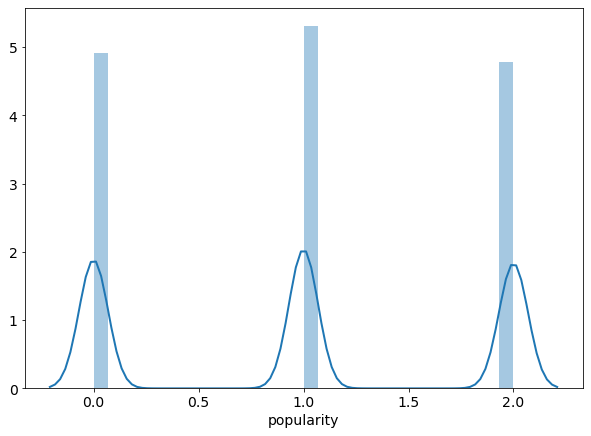

In [98]:
sns.distplot(y_train)

In [126]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
clf = RandomForestClassifier(n_estimators=600)
clf.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=600)

In [53]:
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 600,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [107]:
print(f"Training Data Score: {clf.score(X_train_scaled, y_train):.2f}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test):.2f}")

Training Data Score: 1.00
Testing Data Score: 0.70


In [109]:
# param_grid =   { 
#     'bootstrap': [True],
#     'max_depth': [40, 80, 120],
#     'n_estimators': [100, 300, 600]}
# rfc_grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, verbose=1 )

In [117]:
param_grid =   { 
    'bootstrap': [True],
    'max_depth': [40, 80, 120],
    'n_estimators': [600, 1200]}
rfc_grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, verbose=1 )

In [118]:
rfc_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 32.8min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'n_estimators': [1200]},
             verbose=1)

In [111]:
rfc_grid

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [40, 80, 120],
                         'n_estimators': [100, 300, 600]},
             verbose=1)

In [112]:
print(rfc_grid.best_params_)
print(rfc_grid.best_score_)

{'bootstrap': True, 'max_depth': 40, 'n_estimators': 600}
0.6975726886015994


In [113]:
print(f"Training Data Score: {rfc_grid.score(X_train_scaled, y_train):.2f}")
print(f"Testing Data Score: {rfc_grid.score(X_test_scaled, y_test):.2f}")


Training Data Score: 1.00
Testing Data Score: 0.70


In [119]:
rfc_grid_prediction = rfc_grid.predict(X_test_scaled)

In [120]:
cf_matrix = confusion_matrix(y_test, rfc_grid_prediction)
print(classification_report(y_test, rfc_grid_prediction))

precision    recall  f1-score   support

           0       0.73      0.81      0.77      7678
           1       0.60      0.58      0.59      8110
           2       0.77      0.71      0.74      7485

    accuracy                           0.70     23273
   macro avg       0.70      0.70      0.70     23273
weighted avg       0.70      0.70      0.70     23273



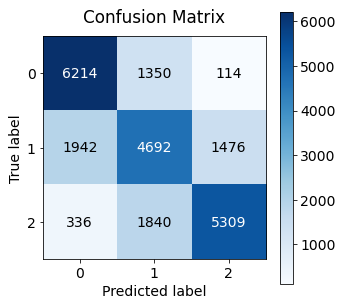

In [121]:
skplt.metrics.plot_confusion_matrix(y_test, rfc_grid_prediction, figsize=(5,5))


In [123]:
# save model
model_filename = 'models/rfc_pop_model.h5'
joblib.dump(rfc_grid, model_filename)

['models/rfc_pop_model.h5']

In [127]:
# save scaler
scaler_filename = 'models/rfc_pop_scaler.h5'
joblib.dump(scaler, scaler_filename)

['models/rfc_pop_scaler.h5']

In [128]:
# test loading model and scaler
model = joblib.load(model_filename)
scaler = joblib.load(scaler_filename)


In [130]:
X_test_scaled_test = scaler.transform(X_test)

y_test_hat = model.predict(X_test_scaled_test)

In [131]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_test_hat)
print('Test accuracy', acc)

Test accuracy 0.6967301164439479
